#A statistic lesson on fetility
##Andrew David Huberman is an American neuroscientist and podcaster.
He is an associate professor of neurobiology and ophthalmology at the Stanford University School of Medicine.
But he made a big statistics mistake!
First please listed to this:



https://youtu.be/O1YRwWmue4Y?t=7357

If I have a 20% chance of conceiving each month (we have a fertility peak once per month) , after 5 months of trying I will reach 100%, and after 6 months... 120%..

According to this theory, if I have a 50% chance of getting heads when flipping a coin once, after two flips I have 100%, and after 3 flips, 150% chance of getting 1 head.

Indeed, to better calculate the number of successes after any number of attempts, we can rely on the binomial distribution (and the cumulative probability):




$P(X)$$=$$\binom{n}{x}$$p^x$$q^{n-x}$

$P(X$≤$k)$$=$$\sum_{i=0}^{k} x_i$ $\binom{n}{i}$$p^i$$q^{n-i}$





In [10]:
# now let's calculate probability of conceiving at least one time after 5 intercourse with R

pbinom(0, 5, 0.2, lower.tail = FALSE)

[1] 0.67232

In [11]:
# and the probability of conceiving at least one time after 6 intercourse (spoiler it is not 120%)

pbinom(0, 6, 0.2, lower.tail = FALSE)

[1] 0.737856

In [13]:
# calculate now the numbers of conceptions in 5 intercourse with a simulation with 10000 couples trying to conceive
set.seed(123)
table(rbinom(10000, 5, 0.2))


   0    1    2    3    4    5 
3289 4143 2013  493   57    5 

As you can see, most of the 10000 couples (3289) conceive only 1 time while coinceiving 5 times is very rare.

This confirms the expected value $E[x]$ formula for binomial distribution
$n$$\times$$p$

In our example the expected value is 1 (one conception).


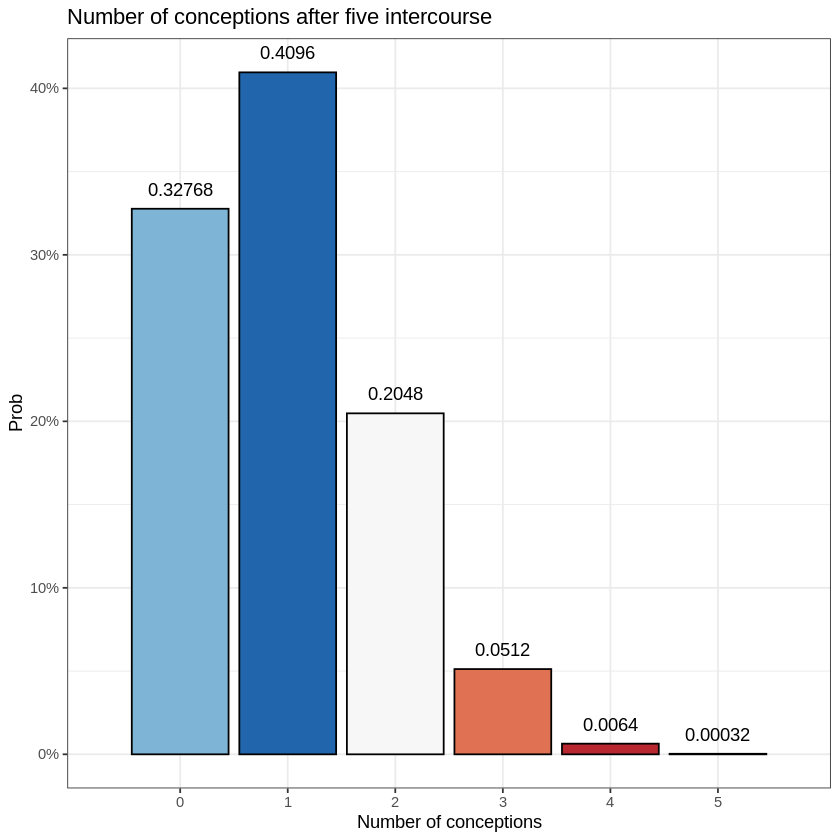

In [36]:
# to better visualize the binomial probability distribution we can plot a graph

conceptions <- c(0:5)

probability <- dbinom(0:5, 5, 0.2)

bin_data <- data.frame(conceptions, probability)

options(warn=-1)

library(ggplot2)

library(scales)

ggplot(bin_data, aes(x=conceptions, y=probability))+
  geom_col(aes(fill = probability), color="black", show.legend = FALSE)+
  geom_text(aes(label=probability), vjust= -1)+
  theme_bw()+
  labs(title = "Number of conceptions after five intercourse",
       y = "Prob", x = "Number of conceptions")+
  scale_x_discrete(limit = c(0:5))+
  scale_y_continuous(labels=percent)+
  scale_fill_distiller(palette = "RdBu", direction = 1)



The probability of having exactly 1 success in 5 attempts (or better, of conceiving once after 5 fertile periods rich in unprotected sexual intercourse) is approximately 40%. Some unlucky couples might not even have a single success, about 33%. And then there are also those who will have to terminate 5 pregnancies out of 5 unwanted ones...

Of course, if we sum all the probabilities of having a number of conceptions different from 0, we obtain the probability of having at least one conception (~	67% and not 100%), as we already did before.



With the negative binomial distribution

$P(X=k)$$=$$\binom{k+r-1}{k}$$p^k$$(1-p)^r$

we can ask how many failures will occur for 10,000 simulated couples before having a conception!

and build a graph with R.



Var1,Freq
<fct>,<int>
0,2058
1,1585
2,1259
3,969
4,797
5,667
6,538
7,421
8,355


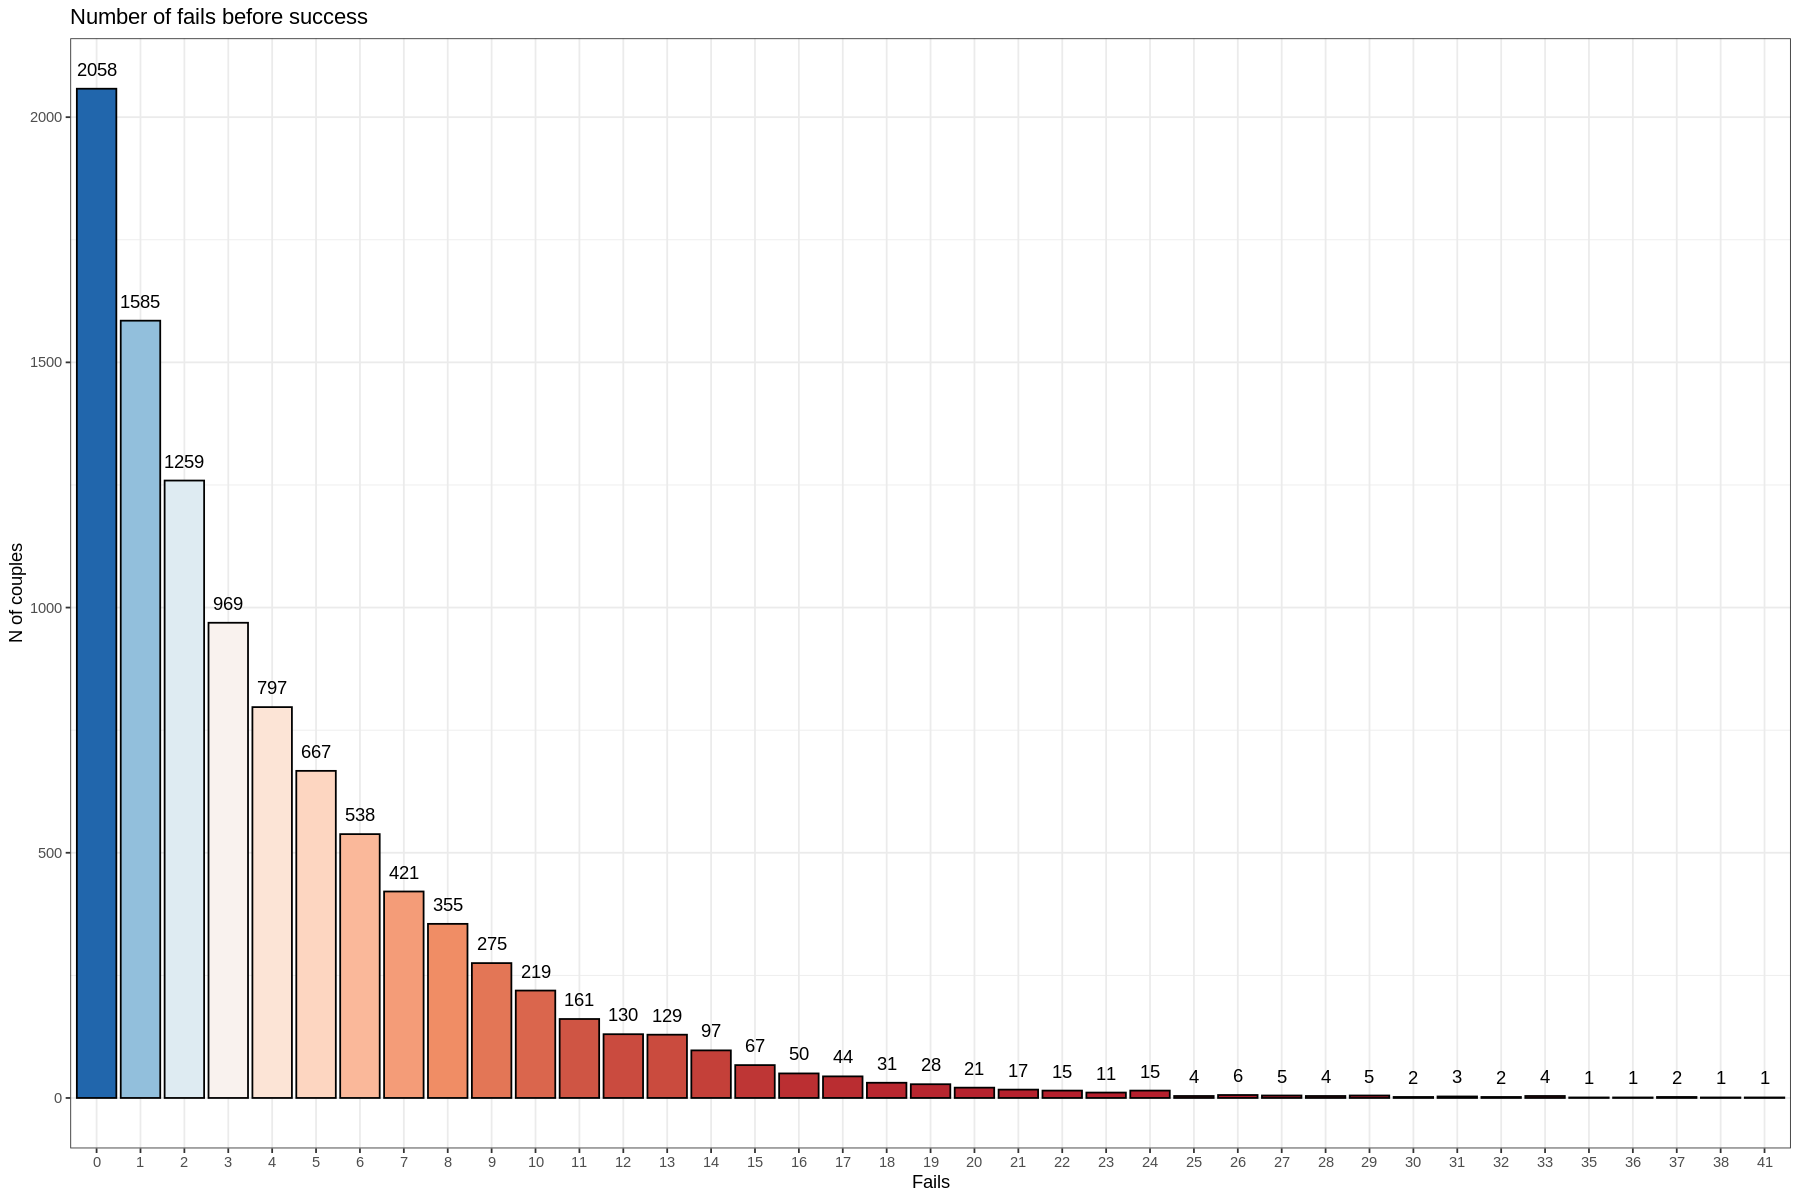

In [45]:
mytable <- table(rnbinom(10000, 1, 0.2))

# convert the table in a data frame and plot

as.data.frame(mytable)

my_table_2 <- as.data.frame(mytable)

library(ggplot2)

library(scales)

options(repr.plot.width = 15, repr.plot.height = 10 )

ggplot(my_table_2, aes(x = Var1, y = Freq))+
  geom_col(aes(fill = Freq), color="black", show.legend = FALSE)+
  geom_text(aes(label = Freq), vjust =  -1)+
  scale_fill_distiller(palette ="RdBu", direction = 1)+
  labs(title = "Number of fails before success",
       y = "N of couples", x = "Fails")+
  theme_bw()

~	2000 out of 10,000 (which is 20%) will succeed on the first attempt! But not all... some unlucky couples will have to try many times. Indeed...

WHO sets the clinical definition for infertility as a disease of the
reproductive system defined by the failure to achieve a clinical
pregnancy AFTER 12 MONTHS or more of regular unprotected sexual
intercourse!

## Takehome message:
Learn statistics + as long as you are 35 or younger with a healty lifestile and no particular medical conditions, wait till 12 months before getting worried about inferitility...and have sex as much as you can.